<a href="https://colab.research.google.com/github/hugomauad/hugomauad/blob/main/TCC_Pucminas_Hugo_Ferreira_Mauad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
*   Linguagem de Processamento Natural (Natural Language Processing - NLP)
*   Os dados foram obtidos através do Kaggle, com cerca de 800 mil tweets, para coletar e rotular os casos de sentimento positivo ou negativo foi utilizado o método usado por Alec Go para realizar essa classificação, emoji ‘😊’ como sentimento positivo e emoji ‘☹’ como sentimento negativo. Para coletar e rotular os dados neutros foram utilizadas hashtags de jornais populares conforme Kouloupis utilizou e tweets de contas de notícias (jornais populares também) como sentimento Neutro.

#Sumário

1. Importando bibliotecas
2. Importando DataDet
3. Análise Exploratória do DataSet
4. Pré Processamento do Texto
5. Análise dos dados
6. Splitting data
7. Vetorização TF-IDF
8. Transformação para vertor
9. Avalização de modelos
  * Modelo MultinomialNB
  * Modelo BernoulliNB
  * Modelo LinearSVC
10. Salvando modelos
11. Usando os modelos
12. Considerações

#Importando bibliotecas

In [1]:
# Bibliotecas gerais
import re
import pickle
import numpy as np
import pandas as pd
import unicodedata
import random
from collections import defaultdict
from collections import Counter

# Plotagem
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# NLTK
import nltk
nltk.download('wordnet')
nltk.download('rslp')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import wordpunct_tokenize

# SKLEARN
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


#Importanto datasets
O DataSet utilizado foi encontrado no Kaggle onde os sentimentos já foram definidos inicialmente (através do link: https://www.kaggle.com/datasets/augustop/portuguese-tweets-for-sentiment-analysis)
Foram distribuidos da seguinte forma:
*   Tweets sem tema (NoThemeTweets.csv)
*   Tweets neutros utilizando hashtag (TweetsNeutralHash.csv)
*   Tweets neutros de contas de noticiários (TweetsNeutralNews.csv)
*   Tweets com tema político (TweetsWithTheme.csv)


In [2]:
# Importação do dataset
dataset1 = pd.read_csv('NoThemeTweets.csv')
dataset2 = pd.read_csv('TweetsNeutralHash.csv')
dataset3 = pd.read_csv('TweetsNeutralNews.csv')
dataset4 = pd.read_csv('TweetsWithTheme.csv')

In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785814 entries, 0 to 785813
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          785814 non-null  int64 
 1   tweet_text  785814 non-null  object
 2   tweet_date  785814 non-null  object
 3   sentiment   785814 non-null  object
 4   query_used  785814 non-null  object
dtypes: int64(1), object(4)
memory usage: 30.0+ MB


In [4]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15727 entries, 0 to 15726
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          15727 non-null  int64 
 1   tweet_text  15727 non-null  object
 2   tweet_date  15727 non-null  object
 3   sentiment   15727 non-null  object
 4   query_used  15727 non-null  object
dtypes: int64(1), object(4)
memory usage: 614.5+ KB


In [5]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37556 entries, 0 to 37555
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          37556 non-null  int64 
 1   tweet_text  37556 non-null  object
 2   tweet_date  37556 non-null  object
 3   sentiment   37556 non-null  object
 4   query_used  37556 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61591 entries, 0 to 61590
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          61591 non-null  int64 
 1   tweet_text  61591 non-null  object
 2   tweet_date  61591 non-null  object
 3   sentiment   61591 non-null  object
 4   query_used  61591 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [7]:
# Unindo datasets em um só
dataset = pd.concat([dataset1, dataset2, dataset3, dataset4])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900688 entries, 0 to 61590
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          900688 non-null  int64 
 1   tweet_text  900688 non-null  object
 2   tweet_date  900688 non-null  object
 3   sentiment   900688 non-null  object
 4   query_used  900688 non-null  object
dtypes: int64(1), object(4)
memory usage: 41.2+ MB


In [8]:
dataset.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1031761728445530112,@Tixaa23 14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,:)
1,1031761040462278656,@drexalvarez O meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,:)
2,1031760962372689920,Eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,:)
3,1031760948250456066,:D que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,:)
4,1031760895985246208,"@Primo_Resmungao Pq da pr jeito!!é uma ""oferta...",Tue Aug 21 04:32:21 +0000 2018,Positivo,:)


In [9]:
# Texto publicado no Twitter
X_col = 'tweet_text'
# Sentimento
y_col = 'sentiment'

In [10]:
# Primeiramente vamos remover as linhas duplicadas baseadas no texto para uma melhor Visualização
dataframe = dataset.drop_duplicates(['tweet_text'], inplace=True)

In [11]:
# Retirando valores NaN dos tweets
dataframe = dataset.dropna()

In [12]:
# Criando um DataFrame, escolhendo nossas colunas de interesse e checando os dados
dataframe = dataset[['tweet_text','sentiment']]
dataframe.count()

tweet_text    879701
sentiment     879701
dtype: int64

#Análise exploratória do dataset

In [13]:
# Contagem dos tweets classificados
Classificacao = dataframe['sentiment']
Classificacao.count()

879701

In [14]:
# Contagem dos tweets com texto
Text = dataframe['tweet_text']
Text.count()

879701

In [15]:
# Observando a distribuilção dos tweets referente ao sentimento positivo, neutro e negativo
temp = dataframe.groupby('sentiment').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,tweet_text
0,Negativo,541026
2,Positivo,285688
1,Neutro,52987


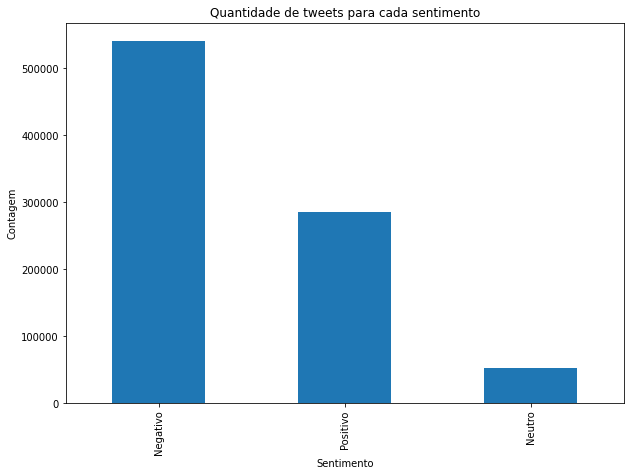

In [16]:
series = dataframe['sentiment'].value_counts()
plt.rcParams['figure.figsize'] = (10, 7)
ax = series.plot(kind='bar', title='Quantidade de tweets para cada sentimento')
ax.set_xlabel('Sentimento')
ax.set_ylabel('Contagem')
plt.show()

## Undersampling  dos dados

In [17]:
df = dataframe
df.count()

tweet_text    879701
sentiment     879701
dtype: int64

In [18]:
df = df.sample(frac=1)

In [19]:
df_neutro = df.loc[df['sentiment']=='Neutro']
df_positivo = df.loc[df['sentiment']=='Positivo'][:52987]
df_negativo = df.loc[df['sentiment']=='Negativo'][:52987]

In [20]:
df_balanced = pd.concat([df_neutro, df_positivo, df_negativo])

In [21]:
new_df = df_balanced.sample(frac=1, random_state=42)

In [22]:
# distribuição do novo dataframe
temp = new_df.groupby('sentiment').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,tweet_text
0,Negativo,52987
1,Neutro,52987
2,Positivo,52987


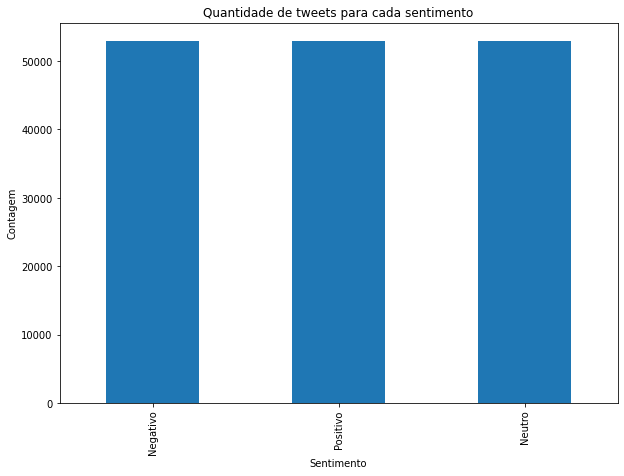

In [23]:
series = new_df['sentiment'].value_counts()
plt.rcParams['figure.figsize'] = (10, 7)
ax = series.plot(kind='bar', title='Quantidade de tweets para cada sentimento')
ax.set_xlabel('Sentimento')
ax.set_ylabel('Contagem')
plt.show()

In [24]:
dataframe = new_df

###**Quantidade de caracteres nos tweets**

In [25]:
# número de caracteres no tweet
def length(text):    
    '''Função do comprimento de caracteres de cara tweet'''
    return len(text)

In [26]:
dataframe['length'] = dataframe['tweet_text'].apply(length)

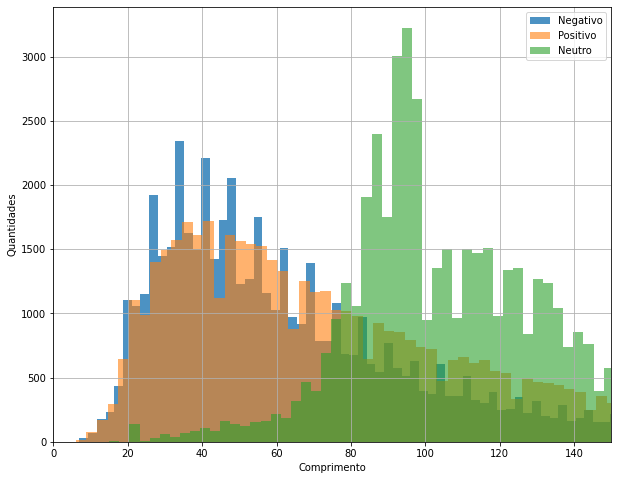

In [27]:
# distribuição de caracter
plt.rcParams['figure.figsize'] = (10.0, 8.0)
bins = 250
plt.hist(dataframe[dataframe['sentiment']=='Negativo']['length'], alpha = 0.8, bins=bins, label='Negativo')
plt.hist(dataframe[dataframe['sentiment']=='Positivo']['length'], alpha = 0.6, bins=bins, label='Positivo')
plt.hist(dataframe[dataframe['sentiment']=='Neutro']['length'], alpha = 0.6, bins=bins, label='Neutro')
plt.xlabel('Comprimento')
plt.ylabel('Quantidades')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

#### Boxplot tamanho do tweet

Text(0.5, 0.98, 'Comprimento médio das palavras nos tweet')

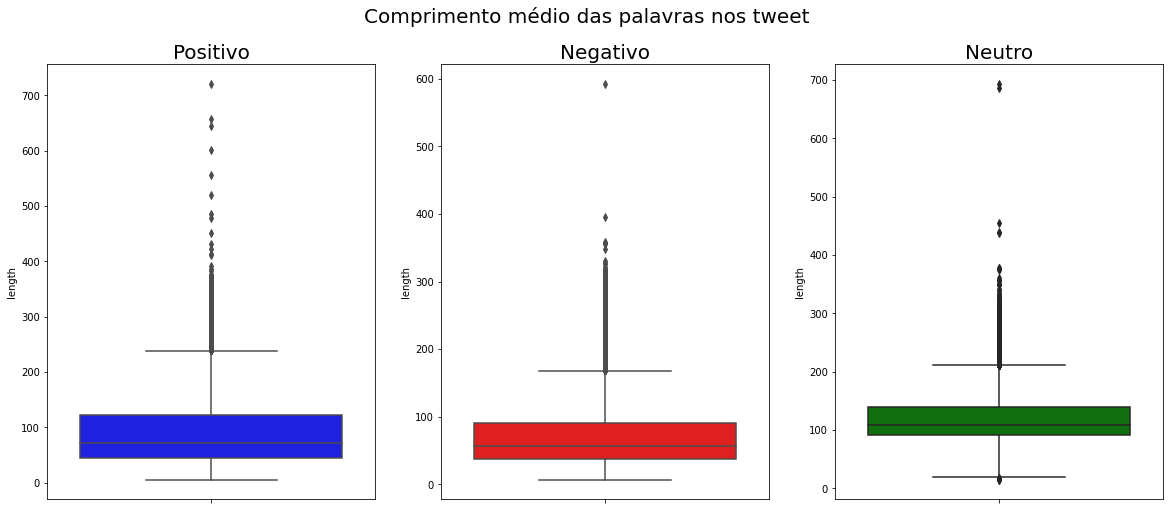

In [28]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(20,8))
tweet_len = dataframe[dataframe['sentiment']=='Positivo']['length']
sns.boxplot(y=tweet_len,ax=ax1,color='blue')
ax1.set_title('Positivo', fontsize=20)
tweet_len = dataframe[dataframe['sentiment']=='Negativo']['length']
sns.boxplot(y=tweet_len,ax=ax2,color='red')
ax2.set_title('Negativo', fontsize=20)
tweet_len = dataframe[dataframe['sentiment']=='Neutro']['length']
sns.boxplot(y=tweet_len,ax=ax3,color='green')
ax3.set_title('Neutro', fontsize=20)
fig.suptitle('Comprimento médio das palavras nos tweet', fontsize=20)

#### Distribuição do tamanho do tweet

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Neutro')

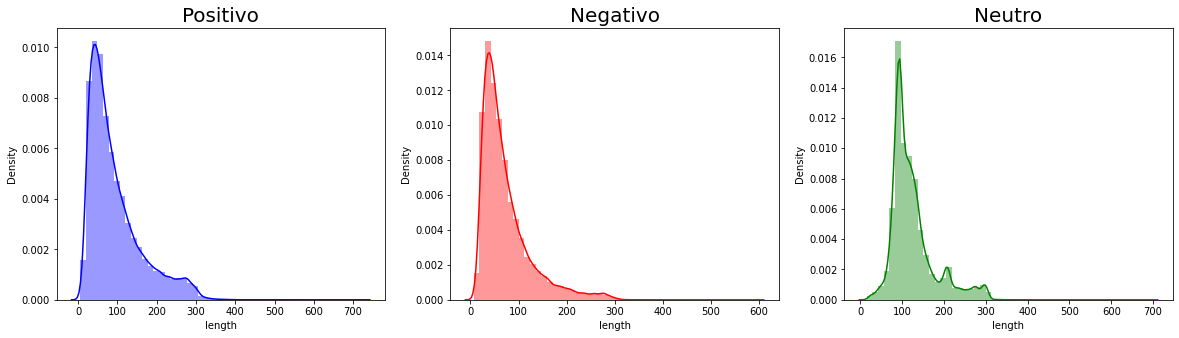

In [29]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(20,5))
tweet_len = dataframe[dataframe['sentiment']=='Positivo']['length']
sns.distplot(tweet_len,ax=ax1,color='blue')
ax1.set_title('Positivo', fontsize=20)
tweet_len = dataframe[dataframe['sentiment']=='Negativo']['length']
sns.distplot(tweet_len,ax=ax2,color='red')
ax2.set_title('Negativo', fontsize=20)
tweet_len = dataframe[dataframe['sentiment']=='Neutro']['length']
sns.distplot(tweet_len,ax=ax3,color='green')
ax3.set_title('Neutro', fontsize=20)
#fig.suptitle('Comprimento médio das palavras nos tweet', fontsize=18)

#### Describe 

In [30]:
# POSITIVO
# Contagem, média, desvio padrão e quartis 
tweet_len = dataframe[dataframe['sentiment']=='Positivo']['length']
tweet_len.describe()

count    52987.000000
mean        93.484194
std         67.074476
min          6.000000
25%         44.000000
50%         72.000000
75%        122.000000
max        720.000000
Name: length, dtype: float64

In [31]:
# NEGATIVO
# Contagem, média, desvio padrão e quartis 
tweet_len = dataframe[dataframe['sentiment']=='Negativo']['length']
tweet_len.describe()

count    52987.000000
mean        72.772982
std         51.578867
min          7.000000
25%         38.000000
50%         57.000000
75%         90.000000
max        592.000000
Name: length, dtype: float64

In [32]:
# NEUTRO
# Contagem, média, desvio padrão e quartis 
tweet_len = dataframe[dataframe['sentiment']=='Neutro']['length']
tweet_len.describe()

count    52987.000000
mean       124.194444
std         52.611875
min         15.000000
25%         91.000000
50%        109.000000
75%        139.000000
max        693.000000
Name: length, dtype: float64

#### Removendo outliers

In [33]:
# Removendo outliers dos valores positivos referente ao tamanho dos caracteres do tweet
outlier_positivo = dataframe['length'].loc[dataframe['sentiment'] == 'Positivo'].values
q25, q75 = np.percentile(outlier_positivo, 25), np.percentile(outlier_positivo, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
positive_iqr = q75 - q25
print('iqr: {}'.format(positive_iqr))

positivo_cut_off = positive_iqr * 1.5
positivo_lower, positivo_upper = q25 - positivo_cut_off, q75 + positivo_cut_off
print('cutoff: {}'.format(positivo_cut_off))
print('Positivo Lower: {}'.format(positivo_lower))
print('Positivo Upper: {}'.format(positivo_upper))

outliers = [x for x in outlier_positivo if x < positivo_lower or x > positivo_upper]
print('Feature Positivo Outliers tweets: {}'.format(len(outliers)))


dataframe = dataframe.drop(dataframe[(dataframe['length'] > positivo_upper) | (dataframe['length'] < positivo_lower)].index)
print('----' * 44)

# Removendo outliers dos valores negativo referente ao tamanho dos caracteres do tweet
outlier_negativo = dataframe['length'].loc[dataframe['sentiment'] == 'Negativo'].values
q25, q75 = np.percentile(outlier_negativo, 25), np.percentile(outlier_negativo, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
negativo_iqr = q75 - q25
print('iqr: {}'.format(negativo_iqr))

negativo_cut_off = negativo_iqr * 1.5
negativo_lower, negativo_upper = q25 - negativo_cut_off, q75 + negativo_cut_off
print('cut off: {}'.format(negativo_cut_off))
print('Negativo Lower: {}'.format(negativo_lower))
print('Negativo Upper: {}'.format(negativo_upper))

outliers = [x for x in outlier_negativo if x < negativo_lower or x > negativo_upper]
print('Feature Negativo Outliers tweets: {}'.format(len(outliers)))


dataframe = dataframe.drop(dataframe[(dataframe['length'] > negativo_upper) | (dataframe['length'] < negativo_lower)].index)
print('----' * 44)

# Removendo outliers dos valores neutro referente ao tamanho dos caracteres do tweet
outlier_neutro = dataframe['length'].loc[dataframe['sentiment'] == 'Neutro'].values
q25, q75 = np.percentile(outlier_neutro, 25), np.percentile(outlier_neutro, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
neutro_iqr = q75 - q25
print('iqr: {}'.format(neutro_iqr))

neutro_cut_off = neutro_iqr * 1.5
neutro_lower, neutro_upper = q25 - neutro_cut_off, q75 + neutro_cut_off
print('Cut off: {}'.format(neutro_cut_off))
print('Neutral Lower: {}'.format(neutro_lower))
print('Neutral Upper: {}'.format(neutro_upper))

outliers = [x for x in outlier_neutro if x < neutro_lower or x > neutro_upper]
print('Feature Neutro Outliers tweets: {}'.format(len(outliers)))


dataframe = dataframe.drop(dataframe[(dataframe['length'] > neutro_upper) | (dataframe['length'] < neutro_lower)].index)
print('----' * 44)

Quartile 25: 44.0 | Quartile 75: 122.0
iqr: 78.0
cutoff: 117.0
Positivo Lower: -73.0
Positivo Upper: 239.0
Feature Positivo Outliers tweets: 2886
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: 37.0 | Quartile 75: 87.0
iqr: 50.0
cut off: 75.0
Negativo Lower: -38.0
Negativo Upper: 162.0
Feature Negativo Outliers tweets: 2614
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: 88.0 | Quartile 75: 122.0
iqr: 34.0
Cut off: 51.0
Neutral Lower: 37.0
Neutral Upper: 173.0
Feature Neutro Outliers tweets: 257
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Text(0.5, 0.98, 'Novo comprimento médio das palavras nos tweet')

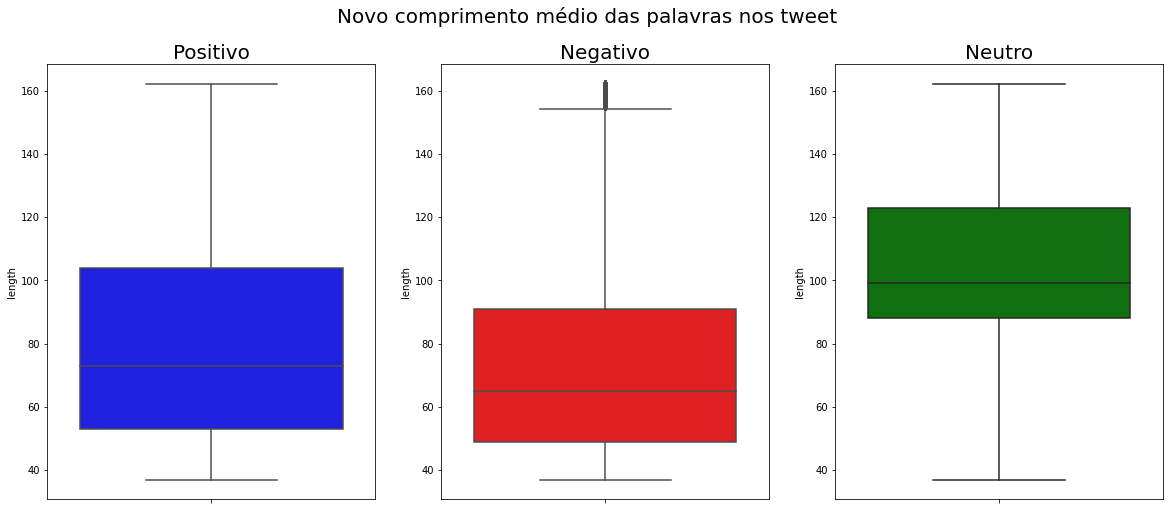

In [34]:
# Novo boxplot
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(20,8))
tweet_len = dataframe[dataframe['sentiment']=='Positivo']['length']
sns.boxplot(y=tweet_len,ax=ax1,color='blue')
ax1.set_title('Positivo', fontsize=20)
tweet_len = dataframe[dataframe['sentiment']=='Negativo']['length']
sns.boxplot(y=tweet_len,ax=ax2,color='red')
ax2.set_title('Negativo', fontsize=20)
tweet_len = dataframe[dataframe['sentiment']=='Neutro']['length']
sns.boxplot(y=tweet_len,ax=ax3,color='green')
ax3.set_title('Neutro', fontsize=20)
fig.suptitle('Novo comprimento médio das palavras nos tweet', fontsize=20)

In [35]:
# Observando a distribuilção dos tweets referente ao sentimento positivo, neutro e negativo
temp = dataframe.groupby('sentiment').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,tweet_text
0,Negativo,36752
2,Positivo,34233
1,Neutro,33258


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Neutro')

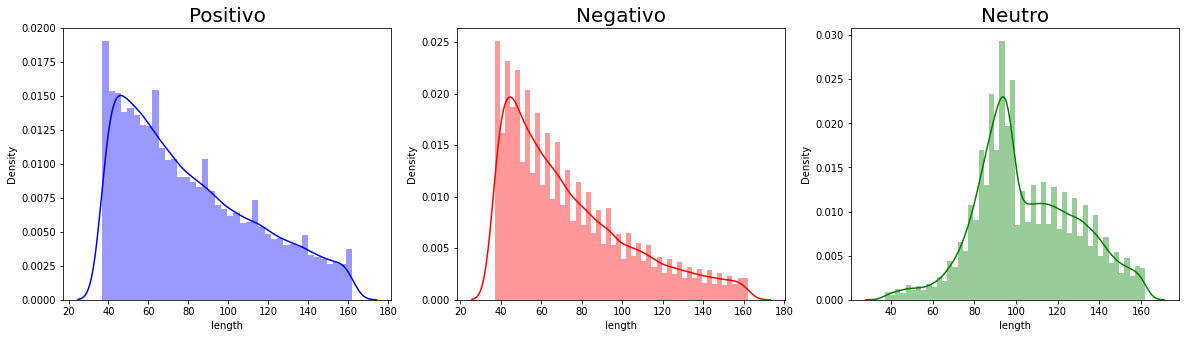

In [36]:
# Nova distribuição de caracter
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(20,5))
tweet_len = dataframe[dataframe['sentiment']=='Positivo']['length']
sns.distplot(tweet_len,ax=ax1,color='blue')
ax1.set_title('Positivo', fontsize=20)
tweet_len = dataframe[dataframe['sentiment']=='Negativo']['length']
sns.distplot(tweet_len,ax=ax2,color='red')
ax2.set_title('Negativo', fontsize=20)
tweet_len = dataframe[dataframe['sentiment']=='Neutro']['length']
sns.distplot(tweet_len,ax=ax3,color='green')
ax3.set_title('Neutro', fontsize=20)

#### Correlação do tamanho do tweet e o sentimento

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


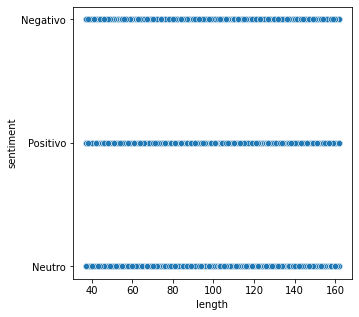

In [37]:
fig,ax =plt.subplots(figsize=(5,5))
sns.scatterplot(dataframe['length'], dataframe['sentiment'])

###**Quantidade de letras nos tweets**

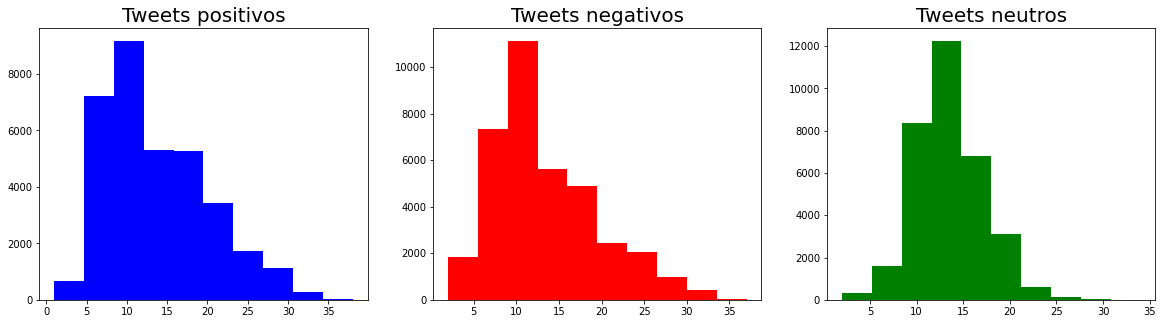

In [38]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(20,5))
tweet_len=dataframe[dataframe['sentiment']=='Positivo']['tweet_text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('Tweets positivos', fontsize=20)
tweet_len=dataframe[dataframe['sentiment']=='Negativo']['tweet_text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='red')
ax2.set_title('Tweets negativos', fontsize=20)
tweet_len=dataframe[dataframe['sentiment']=='Neutro']['tweet_text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='green')
ax3.set_title('Tweets neutros', fontsize=20)
#fig.suptitle('Palavras nos tweets', fontsize=20)
plt.show()

###**Comprimento médio das palavras em um tweet**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Neutro')

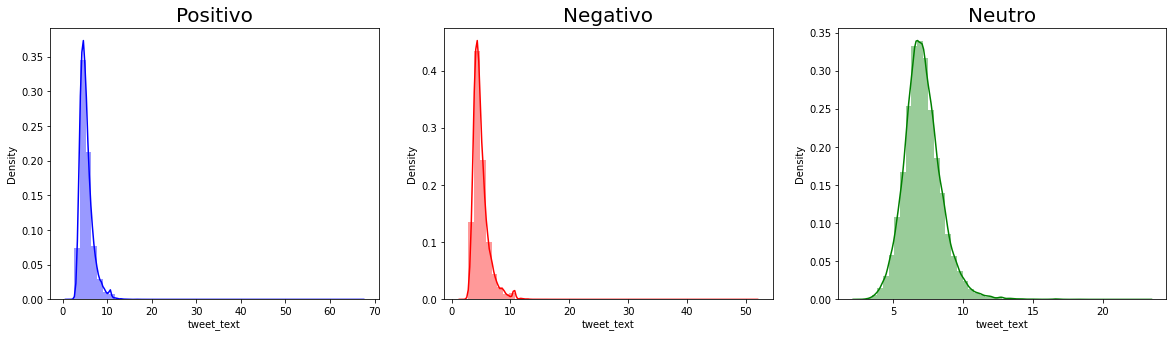

In [39]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(20,5))
word=dataframe[dataframe['sentiment']=='Positivo']['tweet_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Positivo', fontsize=20)
word=dataframe[dataframe['sentiment']=='Negativo']['tweet_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negativo', fontsize=20)
word=dataframe[dataframe['sentiment']=='Neutro']['tweet_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='green')
ax3.set_title('Neutro', fontsize=20)
#fig.suptitle('Comprimento médio das palavras nos tweet')

###**Stopwords mais comuns nos tweets**

In [40]:
#Lista de stopword
stopwordlist = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'uma', 'os', 'no', 'se',
                'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou',
                'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso',
                'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles',
                'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos',
                'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 
                'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso',
                'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas',
                'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava',
                'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos',
                'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram',
                'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos',
                'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou',
                'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos',
                'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria',
                'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos',
                'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver',
                'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']

In [41]:
def create_corpus(sentiment):
    corpus=[]
    
    for x in dataframe[dataframe['sentiment']==sentiment]['tweet_text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [42]:
def create_corpus_df(tweet_text, sentiment):
    corpus=[]
    
    for x in dataframe[dataframe['sentiment']==sentiment]['tweet_text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

* **Analisando os tweets classificados como Positivo**

<BarContainer object of 10 artists>

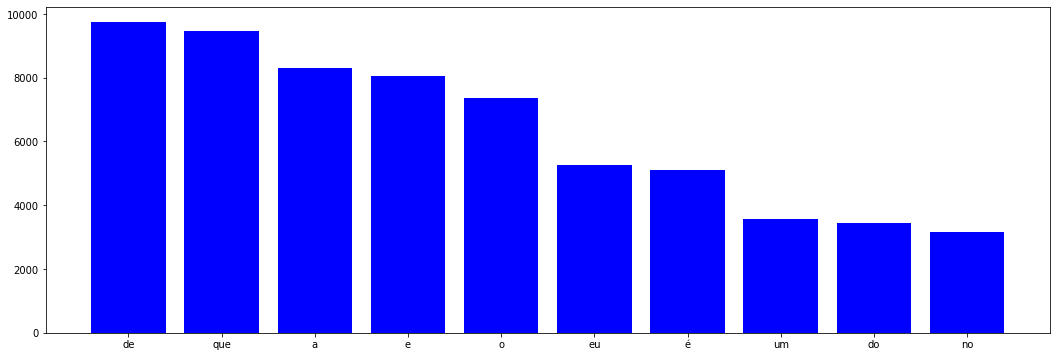

In [43]:
corpus=create_corpus('Positivo')

dic=defaultdict(int)
for word in corpus:
    if word in stopwordlist:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y, color='blue')

* **Analisando os tweets classificados como Negativo**

<BarContainer object of 10 artists>

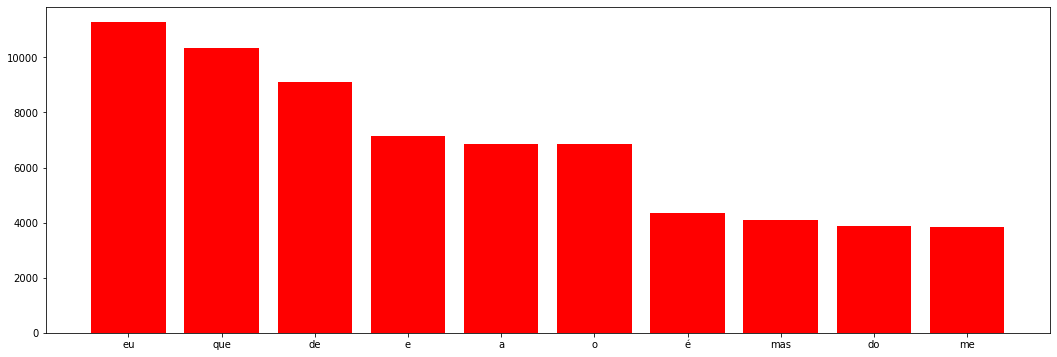

In [44]:
corpus=create_corpus('Negativo')

dic=defaultdict(int)
for word in corpus:
    if word in stopwordlist:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y,color='red')

* **Analisando os tweets classificados como Neutro**

<BarContainer object of 10 artists>

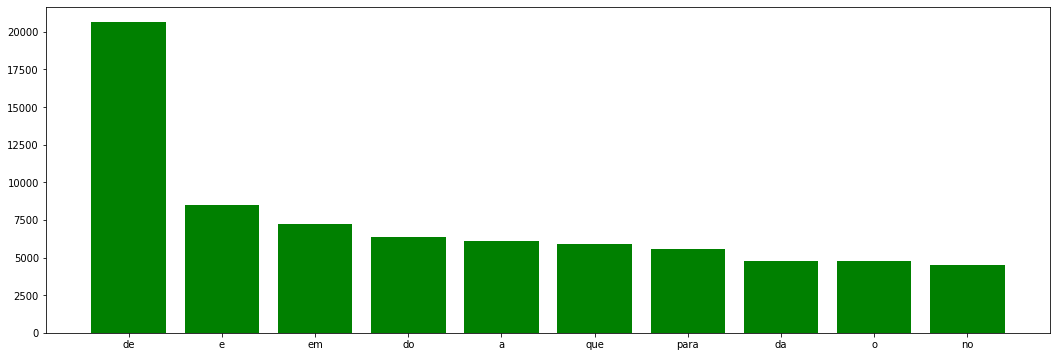

In [45]:
corpus=create_corpus('Neutro')

dic=defaultdict(int)
for word in corpus:
    if word in stopwordlist:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y,color='green')

* **Análise N-gram (n=2)**

In [46]:
plt.figure(figsize=(15,20))
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stopwordlist) :
        x.append(word)
        y.append(count)

<Figure size 1080x1440 with 0 Axes>

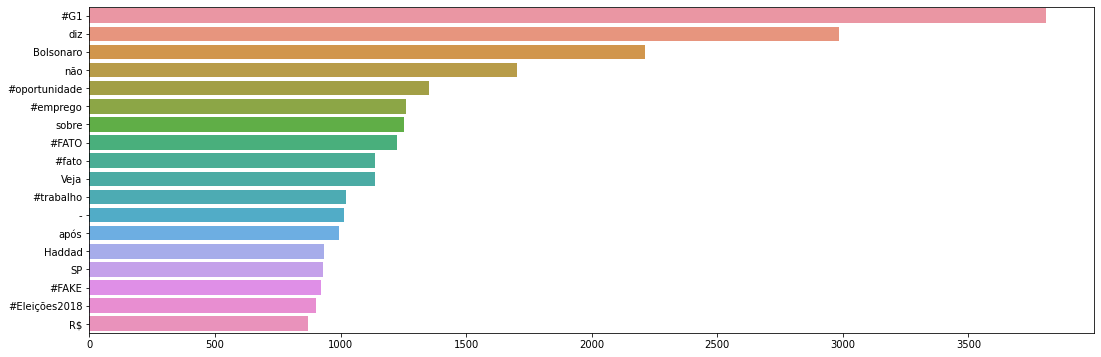

In [47]:
sns.barplot(x=y,y=x)

* **N-gram análise**
Vamos utilizar a análise bigram (n=2)

In [48]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

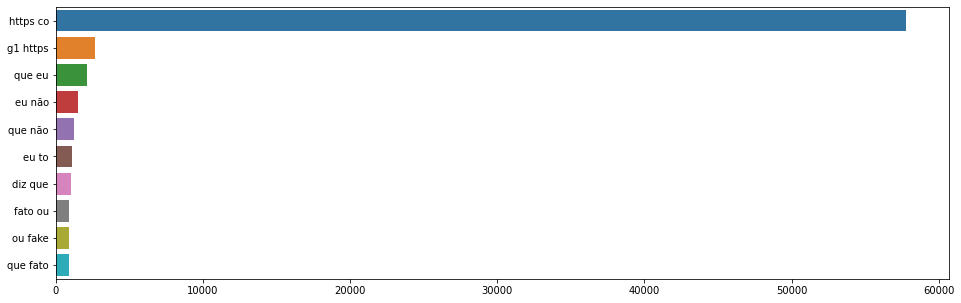

In [49]:
plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(dataframe['tweet_text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [50]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

* **N-gram análise**
Vamos utilizar a análise trigrama (n=3)

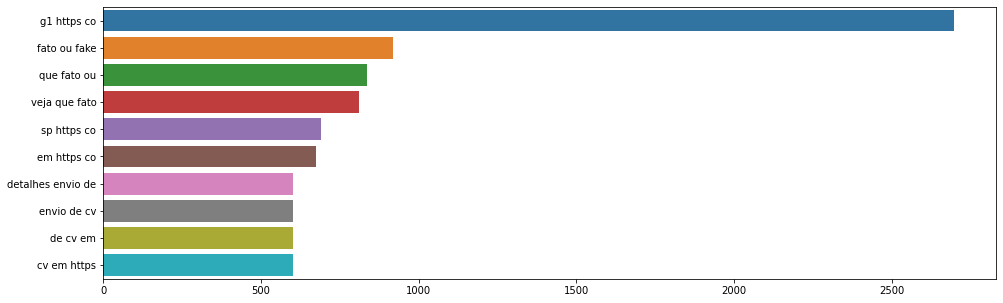

In [51]:
plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(dataframe['tweet_text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

#Pré-processamento e Data Clean

In [52]:
# Definindo um dicionário contendo alguns emojis.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# Definindo alguns StopWord em Português.
stopwordlist = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'uma', 'os', 'no', 'se',
                'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou',
                'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso',
                'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles',
                'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos',
                'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 
                'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso',
                'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas',
                'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava',
                'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos',
                'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram',
                'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos',
                'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou',
                'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos',
                'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria',
                'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos',
                'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver',
                'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']

# Criando mais uma lista de abreviações
std_list = {'eh': 'é', 'vc': 'você', 'vcs': 'vocês','tb': 'também',
            'tbm': 'também', 'obg': 'obrigado', 'gnt': 'gente', 'q': 'que',
            'n': 'não', 'cmg': 'comigo', 'p': 'para', 'ta': 'está',
            'to': 'estou', 'vdd': 'verdade', 'pq': 'porque', 'dps':'depois'}

In [53]:
def Replace_Normalization(textdata):
    processedText = []
 
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-ZÀ-ÖØ-öø-ÿ]" #Tabela ASCII 
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Substituindo todas as URls
        tweet = re.sub(urlPattern,' ',tweet)
        # Substituindo todos os emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, ' ')        
        # Substituindo @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' ', tweet)        
        # Normalização das palavras
        tweet = re.sub(alphaPattern, " ", tweet)
        # Subistituindo 3 ou mais palabras consecutivas.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [54]:
Text = Replace_Normalization(dataframe['tweet_text'])

#### Tokenization

In [55]:
def _tokenize_text(data):
    ls = []

    for line in data:
        tokens = wordpunct_tokenize(line)
        ls.append(tokens)

    return ls

In [56]:
#X_train_tokens = _tokenize_text(Text)
X_train_tokens = _tokenize_text(Text)

In [57]:
# Observando os dados
for i in range(0, 2):
    print(X_train_tokens[i])

['awwn', 'fiquei', 'tao', 'triste', 'ontem']
['eu', 'testei', 'joguei', 'primeiro', 'país', 'mas', 'vou', 'esperar', 'versão', 'de', 'xbox', 'agora']


#### Substituição de abreviações

In [58]:
def _apply_shortening(tokens, std_list):
    ls = []

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            if word.lower() in std_list:
                word = std_list[word.lower()]
                
            new_tokens.append(word) 
            
        ls.append(new_tokens)

    return ls

In [59]:
#X_train_tokens = _apply_shortening(X_train_tokens, std_list)
Text = _apply_shortening(Text, std_list)

In [60]:
# Observando os dados
for i in range(0, 2):
    print(X_train_tokens[i])

['awwn', 'fiquei', 'tao', 'triste', 'ontem']
['eu', 'testei', 'joguei', 'primeiro', 'país', 'mas', 'vou', 'esperar', 'versão', 'de', 'xbox', 'agora']


#### Removendo stopwords


In [61]:
def _remove_stopwords(tokens, stopwordlist):
    ls = []

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            if word.lower() not in stopwordlist:
                new_tokens.append(word) 
            
        ls.append(new_tokens)
        
    return ls

In [62]:
#X_train_tokens = _remove_stopwords(X_train_tokens, stopwordlist)
X_train_tokens = _remove_stopwords(X_train_tokens, stopwordlist)

In [63]:
# Observando os dados
for i in range(0, 2):
    print(X_train_tokens[i])

['awwn', 'fiquei', 'tao', 'triste', 'ontem']
['testei', 'joguei', 'primeiro', 'país', 'vou', 'esperar', 'versão', 'xbox', 'agora']


## WordCloud

In [64]:
def _get_text_cloud(tokens):
    text = ''

    for tk_line in tokens:
        new_corpus_tokens = []
        
        for word in tk_line:
            text += word + ' '
        
    return text

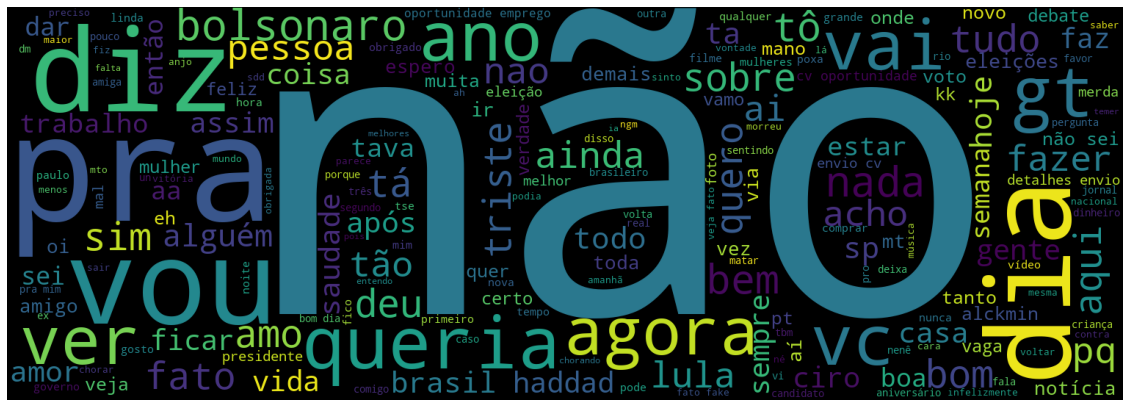

In [65]:
# print Text WordCloud
sample_train = random.sample(X_train_tokens, 1000)
text_cloud = _get_text_cloud(sample_train)
word_cloud = WordCloud(max_font_size = 1000, width = 1520, height = 535)
word_cloud.generate(text_cloud)
plt.figure(figsize = (20, 20))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

####**Aplicando Lematization**

In [66]:
from nltk.stem import WordNetLemmatizer
def _apply_lemmatization(tokens):
    ls = []
    lemmatization = WordNetLemmatizer()

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            word = str(lemmatization.lemmatize(word))
            new_tokens.append(word) 
            
        ls.append(new_tokens)
        
    return ls

In [67]:
X_train_tokens = _apply_lemmatization(X_train_tokens)

In [68]:
# Observando os dados
for i in range(0, 2):
    print(X_train_tokens[i])

['awwn', 'fiquei', 'tao', 'triste', 'ontem']
['testei', 'joguei', 'primeiro', 'país', 'vou', 'esperar', 'versão', 'xbox', 'agora']


####**Aplicando Stemming**

In [69]:
nltk.download('rslp')
def _apply_stemmer(tokens):
    ls = []
    stemmer = nltk.stem.RSLPStemmer()

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            word = str(stemmer.stem(word))
            new_tokens.append(word) 
            
        ls.append(new_tokens)
        
    return ls

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [70]:
X_train_tokens = _apply_stemmer(X_train_tokens)

In [71]:
# Observando os dados
for i in range(0, 2):
    print(X_train_tokens[i])

['awwn', 'fiq', 'tao', 'trist', 'ont']
['test', 'jog', 'prim', 'país', 'vou', 'esper', 'vers', 'xbox', 'agor']


#### Distribuição de frequência

In [72]:
def _get_freq_dist_list(tokens):
    ls = []

    for tk_line in tokens:
        for word in tk_line:
            ls.append(word)
    
    return ls

In [73]:
# Distribuição da Frequência dos dados treinados no DataSet.
fd_list = _get_freq_dist_list(X_train_tokens)
fdist = FreqDist(fd_list)
print(fdist)

<FreqDist with 31107 samples and 748943 outcomes>


In [74]:
# Palavras mais comuns
most_common = fdist.most_common(25)
print(most_common)

[('não', 16073), ('pra', 7248), ('quer', 6496), ('faz', 4447), ('dia', 4311), ('vai', 4282), ('vou', 4080), ('diz', 4041), ('fic', 3842), ('to', 3599), ('fat', 3534), ('vc', 3426), ('bolsonar', 3368), ('tod', 3267), ('gt', 3082), ('bem', 2990), ('pod', 2984), ('fal', 2930), ('ach', 2708), ('tá', 2543), ('trist', 2529), ('trabalh', 2529), ('ano', 2492), ('agor', 2371), ('pq', 2346)]


In [75]:
# Palavras menos comuns (palabras que aparem apenas uma vez)
most_uncommon = fdist.hapaxes()
print(most_uncommon[0:30])

['araut', 'ieon', 'avoc', 'alcap', 'paracamb', 'tricep', 'biblioeus', 'fasig', 'igesp', 'dibêm', 'ewq', 'jêr', 'nahey', 'oak', 'markete', 'jaçanã', 'ariadn', 'ina', 'temdiasqueeusóquer', 'agromed', 'cidadedopanam', 'submissiv', 'ive', 'dgehe', 'grah', 'crt', 'françoz', 'intempes', 'looktb', 'primórdi']


In [76]:
# A palavra que mais apareceu no DataSet
fdist.max()

'não'

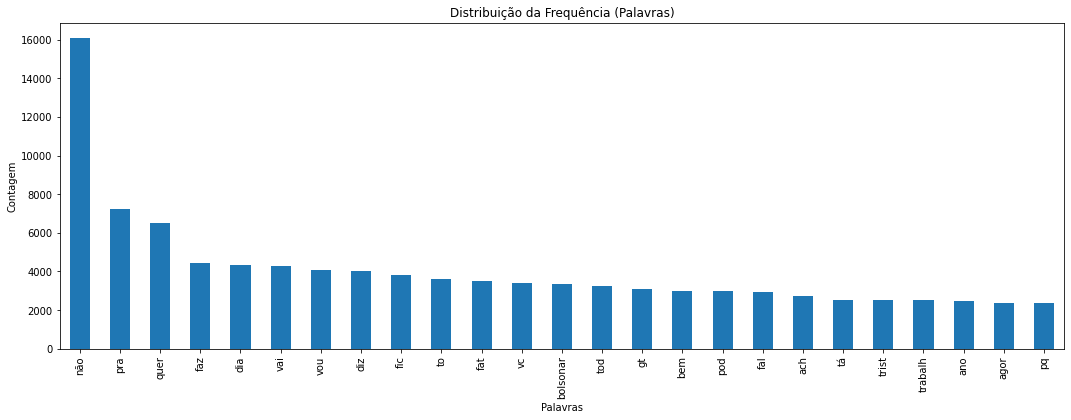

In [77]:
# Gráfico das palavras que mais apareceram no DataSet
series = pd.Series(data=[v for k, v in most_common], index=[k for k, v in most_common], name='')
ax = series.plot(kind='bar', title='Distribuição da Frequência (Palavras)')
ax.set_xlabel('Palavras')
ax.set_ylabel('Contagem')
plt.show()

####**Untokenize Texto**

In [78]:
def _untokenize_text(tokens):
    ls = []

    for tk_line in tokens:
        new_line = ''
        
        for word in tk_line:
            new_line += word + ' '
            
        ls.append(new_line)
        
    return ls

In [79]:
X_train = _untokenize_text(X_train_tokens)

In [80]:
# Observando os dados
for i in range(0, 2):
    print(X_train[i])

awwn fiq tao trist ont 
test jog prim país vou esper vers xbox agor 


## Bag of Words
Os dados pré processados são dividos em dois conjuntos de dados:


1.   **Training Data**: O conjunto de dados no qual o modelo seria treinao contém 95% dos dados.
2.   **Test Data**: O conjunto de dados no qual será testado contém 5% dos dados.


In [81]:
Classificacao = dataframe['sentiment']
Classificacao

324469    Negativo
69284     Positivo
589375    Negativo
21639     Positivo
14211       Neutro
            ...   
23216     Positivo
297045    Negativo
49583     Positivo
588417    Negativo
224268    Negativo
Name: sentiment, Length: 104243, dtype: object

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tokens, 
                                                    Classificacao, test_size = 0.05,
                                                    random_state = 0)
print(f'Data Split feito.')

Data Split feito.


## TF-IDF Vectoriser
TF-IDF indica a importância das palavras para entender o DataSet.

TF-IDF Vectoriser converte uma coleção de documentos brutos em uma matrix de TF-IDF features. O Vectoriser é apenas com o X_train do dataset.

ngram_range foi variado de 3 formas:

1.   ngram_range=(1,2)
2.   ngram_range=(2,2)
3.   ngram_range=(3,3)





In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy_fun(doc):
    return doc

vectoriser = TfidfVectorizer(ngram_range=(1,2), analyzer='word',
                             tokenizer=dummy_fun, preprocessor=dummy_fun,
                             token_pattern=None)
vectoriser.fit(X_train)
print(f'Vectoriser formado.')
print('Número de feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser formado.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Número de feature_words:  383821


## Transformação para vertor

Transformando X_train e X_test do DataSet em uma matriz TF-IDF Features usando TF-IDF Vectoriser Transforming the X_train and X_test dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. Assim será possível iniciar o treinamento do nosso dados e testa-los

In [84]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'DataSet transformado.')

DataSet transformado.


Avalização de modelos

In [85]:
def Avalicao_Modelo(model):
    
    # Predição de valores para o Teste DataSet.
    y_pred = model.predict(X_test)

    # Print nas métrica de avaliação.
    print(classification_report(y_test, y_pred))
    
    # Compute and Plot a Confusion matrix.
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negativo','Positivo', 'Neutro']
    group_names = ['Vedadeiro Neg','Falso Pos', 'Falso Neg','Verdadeiro Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.set(font_scale=2.0)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues',
                xticklabels = categories, yticklabels = categories)
    
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xlabel("Valores Preditivos", fontdict = {'size':20}, labelpad = 10)
    plt.ylabel("Valores Atuais"   , fontdict = {'size':20}, labelpad = 10)
    plt.title ("Matrix de Confusão", fontdict = {'size':20}, pad = 20)

Modelo MultinomialNB

              precision    recall  f1-score   support

    Negativo       0.70      0.83      0.76      1811
      Neutro       0.92      0.94      0.93      1682
    Positivo       0.75      0.59      0.66      1720

    accuracy                           0.79      5213
   macro avg       0.79      0.79      0.78      5213
weighted avg       0.79      0.79      0.78      5213



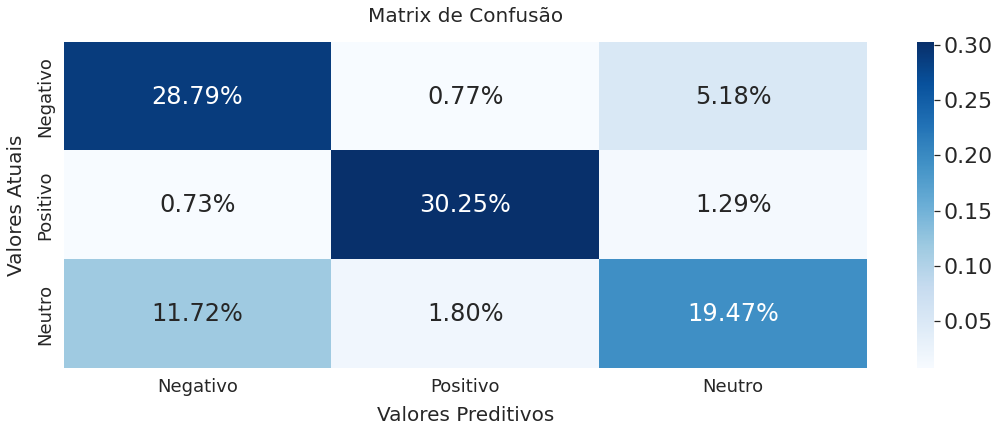

In [86]:
MNBmodel = MultinomialNB()
MNBmodel.fit(X_train, y_train)
Avalicao_Modelo(MNBmodel)

Modelo BernoulliNB

              precision    recall  f1-score   support

    Negativo       0.68      0.74      0.71      1811
      Neutro       0.93      0.92      0.92      1682
    Positivo       0.66      0.61      0.63      1720

    accuracy                           0.75      5213
   macro avg       0.76      0.75      0.76      5213
weighted avg       0.75      0.75      0.75      5213



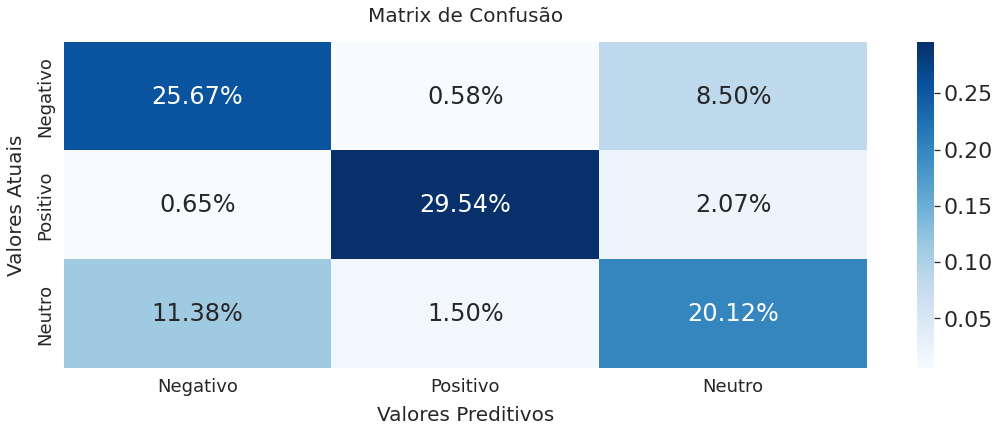

In [87]:
BNBmodel = BernoulliNB(alpha = 0.001)
BNBmodel.fit(X_train, y_train)
Avalicao_Modelo(BNBmodel)

Modelo LinearSVC

              precision    recall  f1-score   support

    Negativo       0.75      0.76      0.76      1811
      Neutro       0.93      0.97      0.95      1682
    Positivo       0.74      0.69      0.71      1720

    accuracy                           0.81      5213
   macro avg       0.81      0.81      0.81      5213
weighted avg       0.80      0.81      0.81      5213



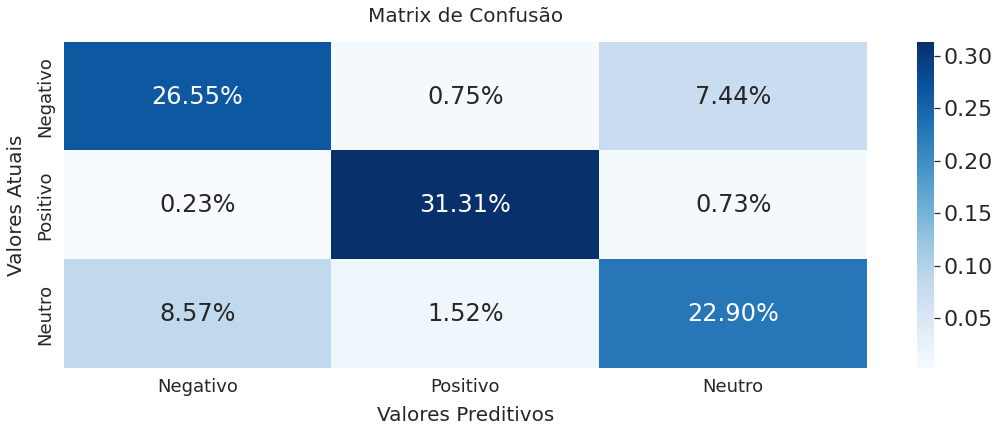

In [88]:
SVCmodel = LinearSVC(random_state=0, tol=1e-5)
SVCmodel.fit(X_train, y_train)
Avalicao_Modelo(SVCmodel)

Savando Modelos

In [89]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-SVC.pickle','wb')
pickle.dump(SVCmodel, file)
file.close()

file = open('Sentiment-MNB.pickle','wb')
pickle.dump(MNBmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()